In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('test', force_remount=True)

Mounted at test


In [ ]:
df1 = pd.read_csv('/content/test/MyDrive/test/application_record.csv') #Details collected at the time of application
df2 = pd.read_csv('/content/test/MyDrive/test/credit_record.csv') #Credit history. The file we have to work with

In [ ]:
df1.shape

(438557, 18)

In [ ]:
df2.shape

(1048575, 3)

In [ ]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


MONTHS_BALANCE indicate the number of months in the past from the current month and STATUS indicates the Credit status of the customer. ID is the unique customer id assigned to that customer.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df2['ID'].nunique()

45985

In total, we have the credit history of 45985 customers to work with

Above mentioned are the different buckets assigned to customers. 'X', '0', 'C', '1' can be considered as good customers while '2', '3', '4', '5' can be considered as bad customers

Now let us find out when the customer begin and what was the last status

In [ ]:
df2.groupby('ID')['MONTHS_BALANCE'].min()

ID
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: MONTHS_BALANCE, Length: 45985, dtype: int64

In [ ]:
#df2.sort_values(by='MONTHS_BALANCE', ascending = False).drop_duplicates(subset='ID')

In [ ]:
df2['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

Now let us mark the customer as bad customer considering whether he/she has reached or crossed bucket 2 

In [ ]:
def mark_bad(status):
  if status in ['2', '3', '4', '5']:
    return 1
  else:
    return 0

In [ ]:
df2['BAD'] = df2['STATUS'].apply(mark_bad)

In [ ]:
df2.head()

,ID,MONTHS_BALANCE,STATUS,BAD
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0


## **Preparing our initial dataframe - Credit** 

In [ ]:
credit = pd.DataFrame(df2.groupby('ID')['MONTHS_BALANCE'].min())
credit.columns = ['month_begin']
credit['bad'] = df2.groupby('ID')['BAD'].max()
#credit['month_end'] = pd.DataFrame(df2.groupby('ID')['MONTHS_BALANCE'].max())

In [ ]:
credit['bad'].value_counts()

0    45318
1      667
Name: bad, dtype: int64

**"bad" column will be our target feature. As can be seen above the target column is highly imbalanced.**

Merge the remaining details of customer id taken at the time of application from df1

In [ ]:
credit = credit.merge(df1, how = 'inner', on= 'ID')

In [ ]:
credit.columns

Index(['ID', 'month_begin', 'bad', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS'],
      dtype='object')

In [ ]:
credit.rename(columns={'CODE_GENDER' : 'gender','FLAG_OWN_CAR' : 'car','FLAG_OWN_REALTY' : 'realty', 'CNT_CHILDREN' : 'children',
                       'AMT_INCOME_TOTAL' : 'income','NAME_INCOME_TYPE' : 'income_type','NAME_EDUCATION_TYPE' : 'education',
                       'NAME_FAMILY_STATUS' : 'family_status','NAME_HOUSING_TYPE' : 'house_type','FLAG_MOBIL' : 'mobile',
                       'FLAG_WORK_PHONE' : 'work_phone','FLAG_PHONE' : 'phone','FLAG_EMAIL' : 'email','OCCUPATION_TYPE' : 'occupation',
                       'CNT_FAM_MEMBERS' : 'family_members'}, inplace = True)

In [ ]:
credit.set_index('ID', drop=True).head()

,month_begin,bad,gender,car,realty,children,income,income_type,education,family_status,house_type,DAYS_BIRTH,DAYS_EMPLOYED,mobile,work_phone,phone,email,occupation,family_members
ID,,,,,,,,,,,,,,,,,,,
5008804,-15,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,-14,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,-29,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,-4,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,-26,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
#Create an age column

credit['age'] = credit['DAYS_BIRTH'] / 365.2425
credit['age'] = credit['age'].round(0).astype(int).abs()

In [ ]:
#Create months employed column

credit['employed_months'] = credit['DAYS_EMPLOYED'] / 30
credit['employed_months'] = credit['employed_months'].round(0).astype(int).abs()

In [ ]:
credit.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'mobile'], axis = 1, inplace= True)

In [ ]:
credit.dropna(inplace=True)
credit.shape

(25134, 19)

In [ ]:
X = credit
y = credit['bad']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## **Some Useful Functions**

In [ ]:
# function to define which all features are categorical features 

def category_variables(df, variables, n): # n is the number of unique values below which the feature would be considered as categorical feature
  cat_var_list = []
  categories = []
  for i in variables:
    if df[i].nunique() <=n :
      cat_var_list.append(i)
      categories.append(df[i].nunique())
  
  return zip(cat_var_list,categories)

In [ ]:
def create_df(df,feat):
    bad = df.loc[df['bad'] == 1][feat].value_counts().reindex(df[feat].unique(), fill_value=0).sort_index()
    #print(bad)
    good = df.loc[df['bad'] == 0][feat].value_counts().reindex(df[feat].unique(), fill_value=0).sort_index()
    #print(good)
    total = df[feat].value_counts().sort_index()
    #print(total)
    #cols = ['bad', 'good', 'total']
    df_new = pd.concat([bad, good, total], axis = 1)
    df_new.columns = ['bad', 'good', 'total']
    return df_new

In [ ]:
# plotting categorical variables

def plotting(cr, feat):

  df = create_df(cr,feat)  
  df['perc'] = (df['bad'] / df['total']) * 100
  
  labels = list(df.index)
  labels = [str(i) for i in labels]
  bad = list(df['bad'])
  total = list(df['total'])
  perc = list(df['perc'])

  fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,6))
  colors = list('rgbkymc')
  
  rect1 = ax1.bar(labels, total, color = colors)
  
  for rect in rect1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % round(height,2), ha='center', va='bottom')
  ax1.spines['right'].set_visible(False)
  ax1.spines['top'].set_visible(False)
  title1 = feat.title() + " wise distribution of total no. of customers"
  ax1.set_title(title1,fontweight="bold", pad = 40)
  ax1.set_xticklabels(labels,rotation = 45, ha='right')

  ax2.pie(perc, labels=labels, colors = colors, autopct='%d%%',wedgeprops={'edgecolor': 'black'})
  title2 = feat.title() + " wise share in bad customers"
  ax2.set_title(title2, fontweight="bold",pad = 40)
  
  plt.tight_layout
  plt.show()


In [ ]:
def calc_iv(df_new,feat) :
    df_new = create_df(df_new,feat)
    #print(df_new)
    df_new['dist_bad'] = df_new['bad'] / df_new['bad'].sum()
    df_new['dist_good'] = df_new['good'] / df_new['good'].sum()
    df_new['WOE'] = np.log(df_new['dist_good'] / df_new['dist_bad'])
    df_new['WOE'] = np.where((df_new['WOE'] == np.inf) | (df_new['WOE'] == -np.inf), 0, df_new['WOE'])
    df_new['IV'] = df_new['WOE'] * (df_new['dist_good'] - df_new['dist_bad'])
    iv = df_new['IV'].sum()
    return iv, df_new['WOE']


In [ ]:
def plotting_big(cr, feat):
  # Plotting string variables ie having more number of categories.
  df = create_df(cr,feat)
  df['perc'] = (df['bad'] / df['total'])*100
  
  labels = list(df.index)
  labels = [str(i) for i in labels]
  bad = list(df['bad'])
  total = list(df['total'])
  perc = list(df['perc'])

  if len(labels) <= 10:
    i = 10
  else :
    i = len(labels)
  figure, (ax1,ax2) = plt.subplots(2,1,figsize = (i,10), sharex=True)
  
  rect1 = ax1.bar(labels,total, color = list('rgbkymc'))
  #    Attach a text label above each bar displaying its height
  for rect in rect1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % round(height,2), ha='center', va='bottom')

  ax1.spines['right'].set_visible(False)
  ax1.spines['top'].set_visible(False)

  rect2 = ax2.bar(labels,perc, color = list('rgbkymc'))
  #    Attach a text label above each bar displaying its height
  for rect in rect2:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%.2f%%' % round(height,2), ha='center', va='bottom')

  ax2.spines['right'].set_visible(False)
  ax2.spines['top'].set_visible(False)

  plt.xticks(rotation = 45, ha='right')
  plt.show()

In [ ]:
def plotting_cont(cr, feat, bins):
  fig1, (axes1,axes2) = plt.subplots(nrows = 1,ncols = 2, figsize = (10,4))

  sns.histplot(data = cr, x = feat , bins = bins, ax = axes1)
  sns.boxplot(data = cr, y = feat, ax = axes2)

  plt.tight_layout()
  plt.show()



### **Some EDA**

In [ ]:
cat_cols = pd.DataFrame(category_variables(X_train, X_train.columns, 5), columns = ['Features','categories'])
cat_cols

,Features,categories
0,bad,2
1,gender,2
2,car,2
3,realty,2
4,income_type,5
5,education,5
6,family_status,5
7,work_phone,2
8,phone,2
9,email,2


### Now let us start exploring each columns and do feature engineering wherever required.

In [ ]:
IV_dict = {'Feature': "Value"}

## ***1. Gender***

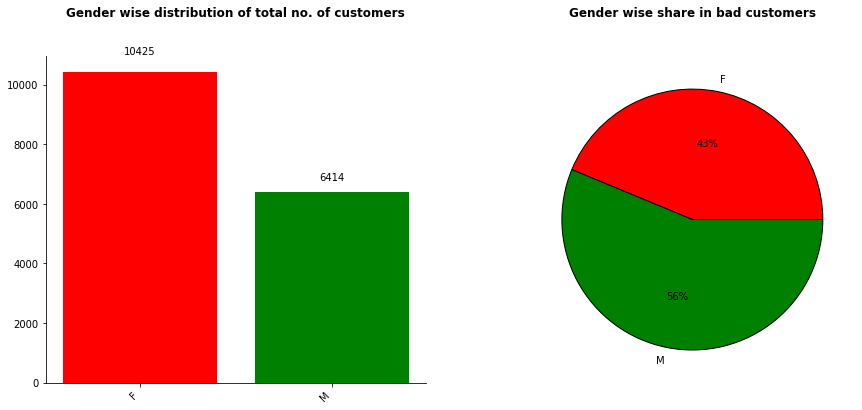

In [ ]:
plotting(X_train,'gender')

In [ ]:
gender_iv, gender_WOE = calc_iv(X_train, 'gender')

In [ ]:
gender_WOE

F    0.105038
M   -0.150813
Name: WOE, dtype: float64

In [ ]:
gender_iv

0.015820277332501857

In [ ]:
IV_dict['gender'] = gender_iv

## ***2. Car***

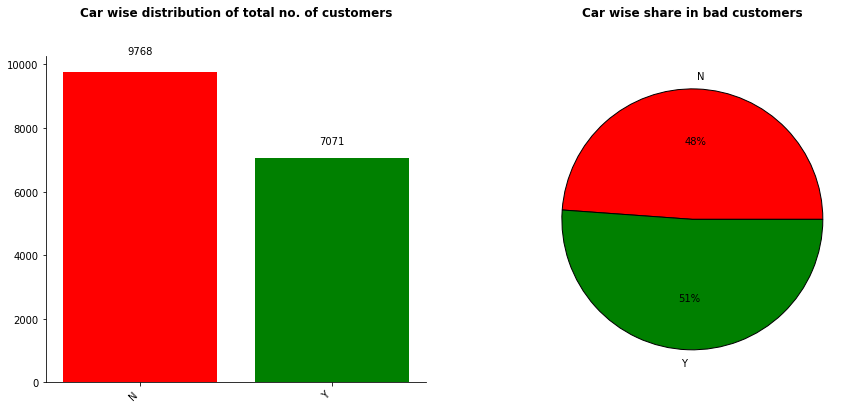

In [ ]:
plotting(X_train,'car')

In [ ]:
car_IV, car_WOE = calc_iv(X_train, 'car')
print(car_WOE)
print(car_IV)

N    0.019786
Y   -0.026725
Name: WOE, dtype: float64
0.0005287555757174419


In [ ]:
IV_dict['car'] = car_IV

## ***3. Realty***

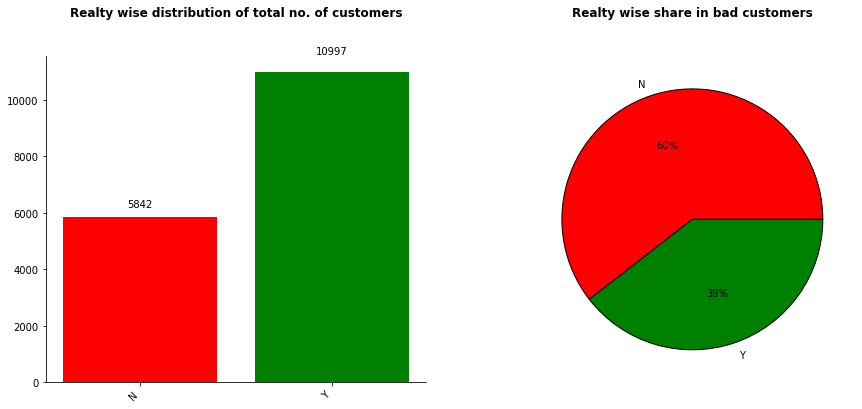

In [ ]:
plotting(X_train,'realty')

In [ ]:
realty_IV, realty_WOE = calc_iv(X_train, 'realty')
print(realty_WOE)
print(realty_IV)

N   -0.262394
Y    0.172178
Name: WOE, dtype: float64
0.045009135432773656


In [ ]:
IV_dict['realty'] = realty_IV

## ***4. Income Type***

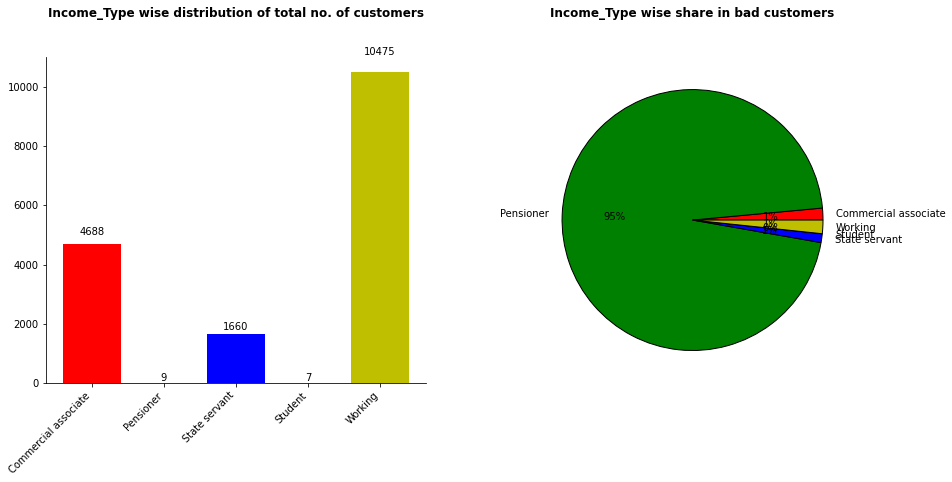

In [ ]:
plotting(X_train,'income_type')

In [ ]:
inc_type_IV, inc_type_WOE = calc_iv(X_train, 'income_type')
print(inc_type_WOE)
print(inc_type_IV)

Commercial associate    0.091561
Pensioner               0.000000
State servant           0.389565
Student                 0.000000
Working                -0.039421
Name: WOE, dtype: float64
0.015677329338646247


In [ ]:
X_train['income_type_bins'] = X_train['income_type']
m = X_train['income_type_bins'] != 'State servant'
X_train.loc[m, 'income_type_bins'] = 'Others' 

In [ ]:
X_test['income_type_bins'] = X_test['income_type']
m = X_test['income_type_bins'] != 'State servant'
X_test.loc[m, 'income_type_bins'] = 'Others' 

In [ ]:
inc_type_IV, inc_type_WOE = calc_iv(X_train, 'income_type_bins')
print(inc_type_WOE)
print(inc_type_IV)

Others          -0.034883
State servant    0.389565
Name: WOE, dtype: float64
0.01357400592373291


In [ ]:
IV_dict['income_type'] = inc_type_IV

## ***5. Education***

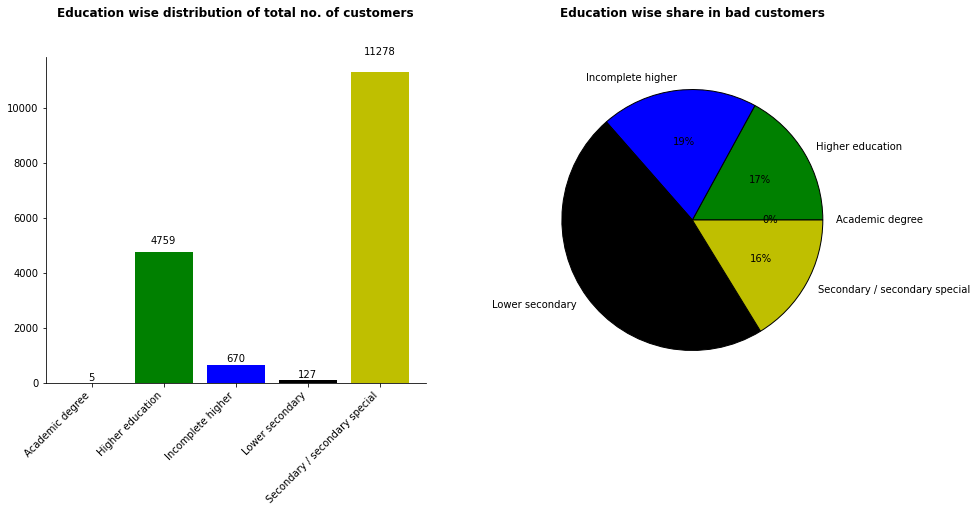

In [ ]:
plotting(X_train,'education')

In [ ]:
education_IV, education_WOE = calc_iv(X_train, 'education')
print(education_WOE)
print(education_IV)

Academic degree                  0.000000
Higher education                -0.012880
Incomplete higher               -0.146322
Lower secondary                 -1.065026
Secondary / secondary special    0.035707
Name: WOE, dtype: float64
0.016597745773306697


In [ ]:
IV_dict['education'] = education_IV

## ***6. Family Status***

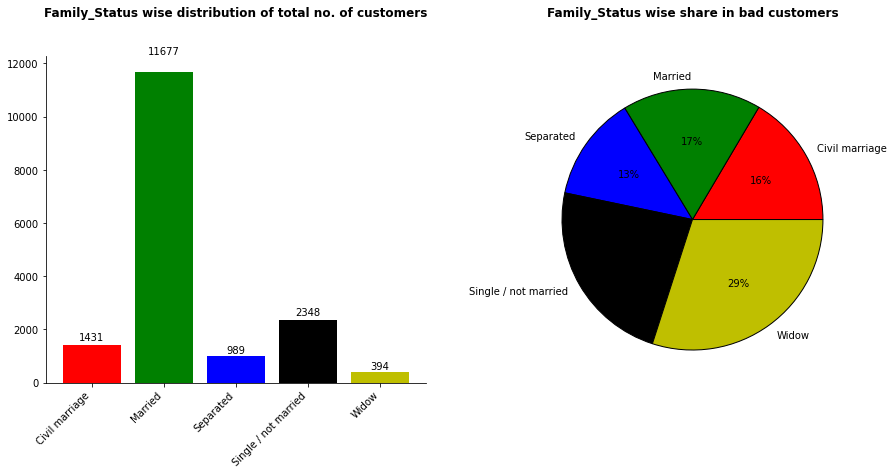

In [ ]:
plotting(X_train,'family_status')

In [ ]:
family_status_IV, family_status_WOE = calc_iv(X_train, 'family_status')
print(family_status_WOE)
print(family_status_IV)

Civil marriage          0.090536
Married                 0.049067
Separated               0.330523
Single / not married   -0.261523
Widow                  -0.518917
Name: WOE, dtype: float64
0.02679821043767111


In [ ]:
IV_dict['family_status'] = family_status_IV

## ***7. Work Phone***

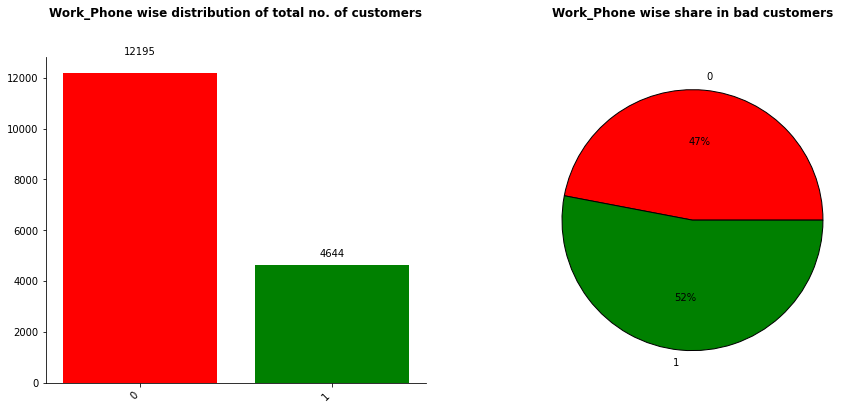

In [ ]:
plotting(X_train,'work_phone')

In [ ]:
work_phone_IV, work_phone_WOE = calc_iv(X_train, 'work_phone')
print(work_phone_WOE)
print(work_phone_IV)

0    0.035088
1   -0.086850
Name: WOE, dtype: float64
0.003046598589388771


In [ ]:
IV_dict['work_phone'] = work_phone_IV

## ***8. Phone***

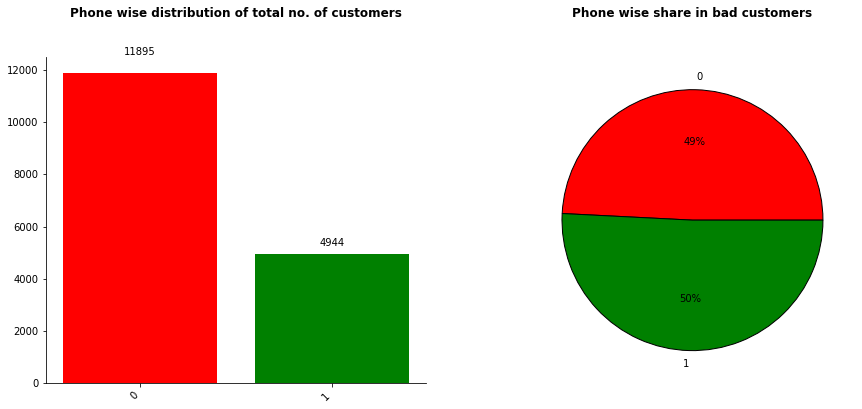

In [ ]:
plotting(X_train,'phone')

In [ ]:
phone_IV, phone_WOE = calc_iv(X_train, 'phone')
print(phone_WOE)
print(phone_IV)

0    0.009764
1   -0.023120
Name: WOE, dtype: float64
0.00022573501397385053


In [ ]:
IV_dict['phone'] = phone_IV

## ***9. Email***

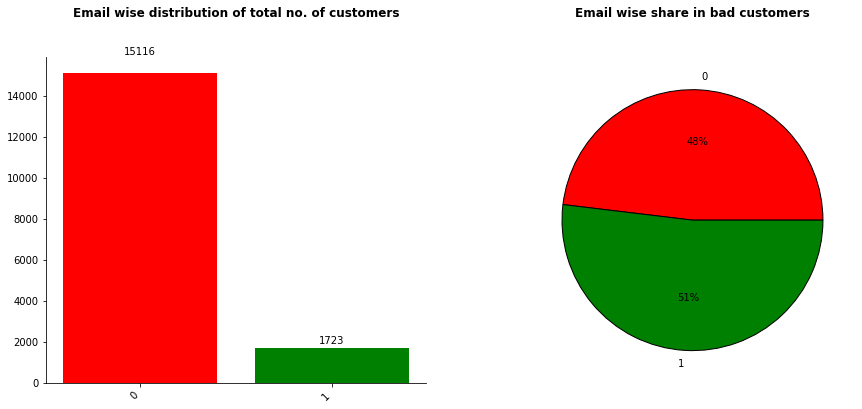

In [ ]:
plotting(X_train,'email')

In [ ]:
email_IV, email_WOE = calc_iv(X_train, 'email')
print(email_WOE)
print(email_IV)

0    0.008211
1   -0.069378
Name: WOE, dtype: float64
0.0005696616136996426


In [ ]:
IV_dict['email'] = email_IV

## ***10. Occupation***

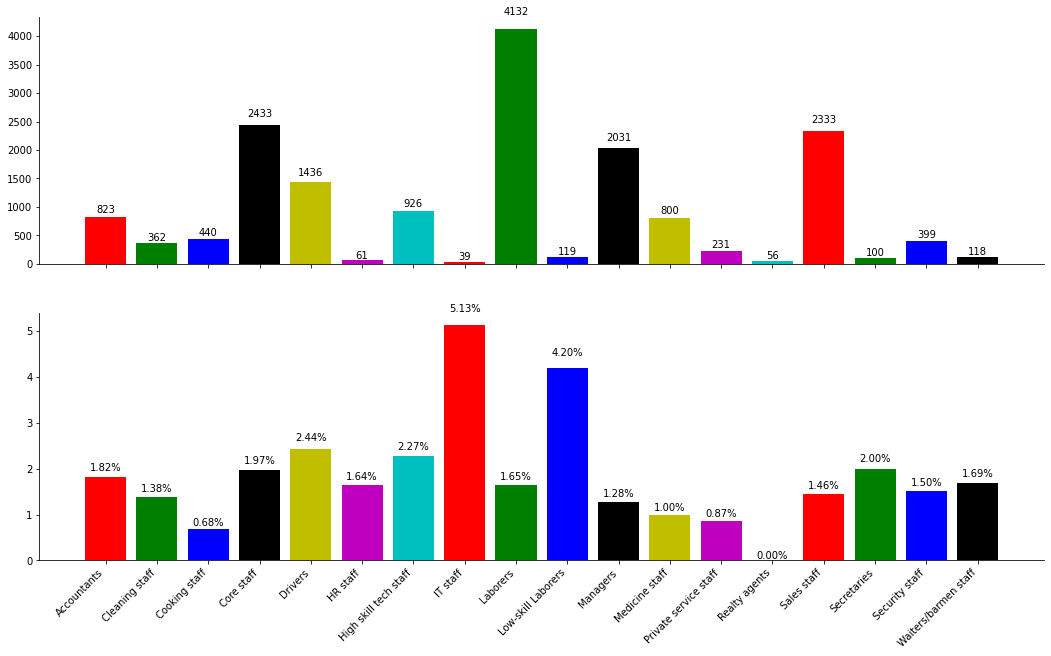

In [ ]:
plotting_big(X_train,'occupation')

Observations
- Laborers category has the highest no. of credit card takers with one of the lowest defaulting rate
- None of the realty agents are bad customers
- Core staff also seems to be one of the category with highest no. of bad customers.

In [ ]:
occupation_IV, occupation_WOE = calc_iv(X_train, 'occupation')
print(occupation_WOE.sort_values())
print(occupation_IV)

IT staff                -1.151286
Low-skill Laborers      -0.942296
Drivers                 -0.379463
High skill tech staff   -0.305644
Secretaries             -0.177237
Core staff              -0.163304
Accountants             -0.082545
Waiters/barmen staff    -0.008614
Realty agents            0.000000
Laborers                 0.021358
HR staff                 0.025288
Security staff           0.112993
Sales staff              0.144812
Cleaning staff           0.199241
Managers                 0.276246
Medicine staff           0.526063
Private service staff    0.671518
Cooking staff            0.912264
Name: WOE, dtype: float64
0.08244698235652732


In [ ]:
X_train['occupation'].value_counts(normalize = True)

Laborers                 0.245383
Core staff               0.144486
Sales staff              0.138547
Managers                 0.120613
Drivers                  0.085278
High skill tech staff    0.054991
Accountants              0.048875
Medicine staff           0.047509
Cooking staff            0.026130
Security staff           0.023695
Cleaning staff           0.021498
Private service staff    0.013718
Low-skill Laborers       0.007067
Waiters/barmen staff     0.007008
Secretaries              0.005939
HR staff                 0.003623
Realty agents            0.003326
IT staff                 0.002316
Name: occupation, dtype: float64

In [ ]:
X_train['occupation_bins'] = X_train['occupation']
m = X_train['occupation_bins'].isin(['Cooking staff','Security staff','Cleaning staff','Private service staff','Low-skill Laborers','Waiters/barmen staff','Secretaries','HR staff','Realty agents','IT staff'])
X_train.loc[m,'occupation_bins'] = 'Other Occupations' 

In [ ]:
X_test['occupation_bins'] = X_test['occupation']
m = X_test['occupation_bins'].isin(['Cooking staff','Security staff','Cleaning staff','Private service staff','Low-skill Laborers','Waiters/barmen staff','Secretaries','HR staff','Realty agents','IT staff'])
X_test.loc[m,'occupation_bins'] = 'Other Occupations' 

In [ ]:
occupation_IV, occupation_WOE = calc_iv(X_train, 'occupation_bins')
print(occupation_WOE.sort_values())
print(occupation_IV)

Drivers                 -0.379463
High skill tech staff   -0.305644
Core staff              -0.163304
Accountants             -0.082545
Laborers                 0.021358
Sales staff              0.144812
Other Occupations        0.146768
Managers                 0.276246
Medicine staff           0.526063
Name: WOE, dtype: float64
0.048798882392810175


In [ ]:
IV_dict['occupation'] = occupation_IV

## ***11. House Type*** 

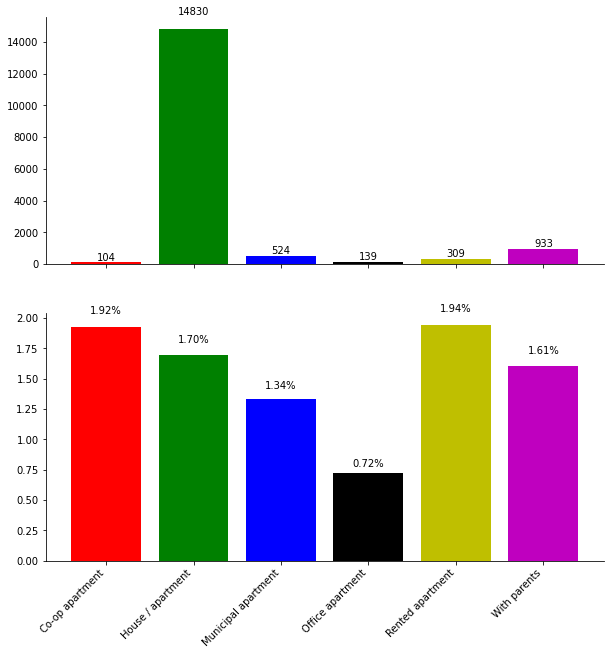

In [ ]:
plotting_big(X_train, 'house_type')

In [ ]:
X_train['house_type'].value_counts(normalize = True)

House / apartment      0.880694
With parents           0.055407
Municipal apartment    0.031118
Rented apartment       0.018350
Office apartment       0.008255
Co-op apartment        0.006176
Name: house_type, dtype: float64

In [ ]:
lst = ['Municipal apartment','Rented apartment','Office apartment', 'Co-op apartment']
m = X_train['house_type'].isin(lst)
X_train.loc[m,'house_type'] = 'Other Housing'

In [ ]:
m = X_test['house_type'].isin(lst)
X_test.loc[m,'house_type'] = 'Other Housing'

In [ ]:
X_train['house_type'].value_counts(normalize = True)

House / apartment    0.880694
Other Housing        0.063899
With parents         0.055407
Name: house_type, dtype: float64

In [ ]:
house_type_IV, house_type_WOE = calc_iv(X_train, 'house_type')
print(house_type_WOE.sort_values())
print(house_type_IV)

House / apartment   -0.011217
With parents         0.045090
Other Housing        0.124379
Name: WOE, dtype: float64
0.0011529957213797602


In [ ]:
IV_dict['house_type'] = house_type_IV

## ***12. Children***

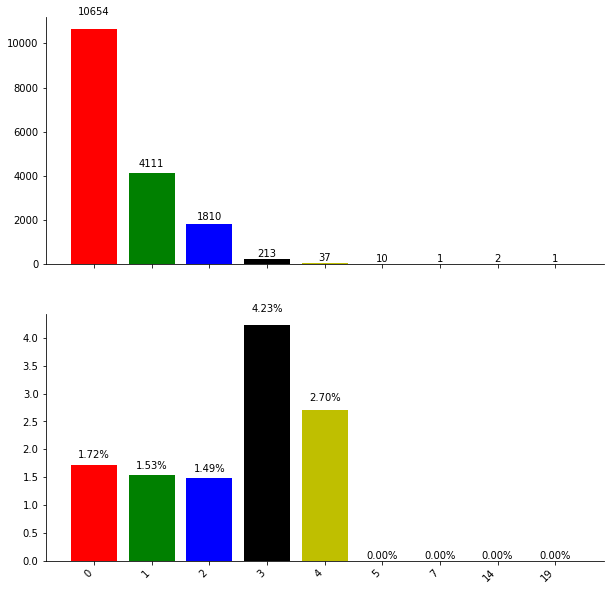

In [ ]:
plotting_big(X_train, 'children')

In [ ]:
X_train['children'].value_counts(normalize = True)

0     0.632698
1     0.244136
2     0.107489
3     0.012649
4     0.002197
5     0.000594
14    0.000119
7     0.000059
19    0.000059
Name: children, dtype: float64

Here we need club 2 and more than 2 children together inorder to make the bin having more than 5% values.

In [ ]:
X_train['children_bins'] = X_train['children']
m = X_train['children_bins'] >=2
X_train.loc[m, 'children_bins'] = '2 plus'
X_train['children_bins'] = X_train['children_bins'].astype(str)

In [ ]:
X_test['children_bins'] = X_test['children']
m = X_test['children_bins'] >=2
X_test.loc[m, 'children_bins'] = '2 plus'
X_test['children_bins'] = X_test['children_bins'].astype(str)

In [ ]:
X_train['children_bins'].value_counts(normalize = True)

0         0.632698
1         0.244136
2 plus    0.123166
Name: children_bins, dtype: float64

In [ ]:
children_IV, children_WOE = calc_iv(X_train, 'children_bins')
print(children_WOE)
print(children_IV)

0        -0.022178
1         0.093787
2 plus   -0.060741
Name: WOE, dtype: float64
0.002835447277073362


In [ ]:
IV_dict['children'] = children_IV

## ***13. Family Members***

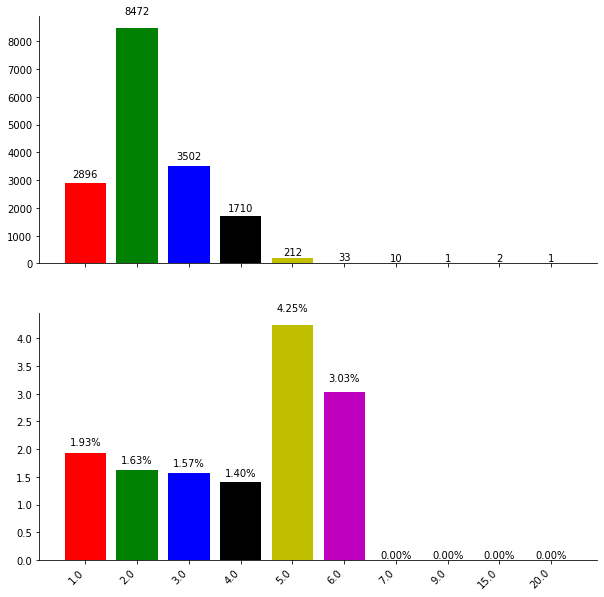

In [ ]:
plotting_big(X_train, 'family_members')

In [ ]:
X_train['family_members'].value_counts(normalize = True)

2.0     0.503118
3.0     0.207970
1.0     0.171982
4.0     0.101550
5.0     0.012590
6.0     0.001960
7.0     0.000594
15.0    0.000119
20.0    0.000059
9.0     0.000059
Name: family_members, dtype: float64

In [ ]:
X_train['family_members_bins'] = X_train['family_members']
m = X_train['family_members_bins'] >=4
X_train.loc[m, 'family_members_bins'] = '4 plus'
X_train['family_members_bins'] = X_train['family_members_bins'].astype(str)

In [ ]:
X_test['family_members_bins'] = X_test['family_members']
m = X_test['family_members_bins'] >=4
X_test.loc[m, 'family_members_bins'] = '4 plus'
X_test['family_members_bins'] = X_test['family_members_bins'].astype(str)

In [ ]:
family_members_IV, family_members_MOE = calc_iv(X_train,'family_members_bins')

In [ ]:
print(family_members_MOE)
print(family_members_IV)

1.0      -0.142849
2.0       0.031788
3.0       0.068869
4 plus   -0.027555
Name: WOE, dtype: float64
0.0053076743506193964


In [ ]:
IV_dict['family_members'] = family_members_IV

## ***14. Month Begin***

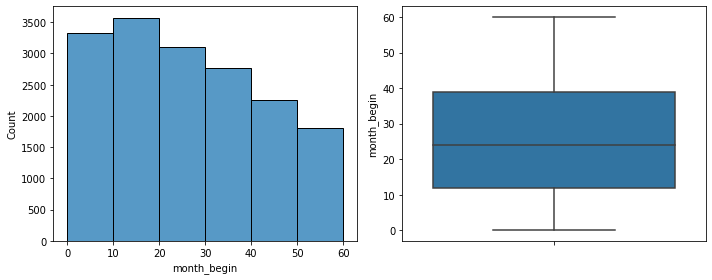

In [ ]:
X_train['month_begin'] = X_train['month_begin'].abs()
X_test['month_begin'] = X_test['month_begin'].abs()
plotting_cont(X_train,'month_begin',6)

In [ ]:
X_train['month_begin'].describe()

count    16839.000000
mean        26.024705
std         16.375547
min          0.000000
25%         12.000000
50%         24.000000
75%         39.000000
max         60.000000
Name: month_begin, dtype: float64

In [ ]:
month_begin_bins = [ 0, 10, 20, 30, 40, 50, 60]
month_begin_labels = ['below 10','10 to 20', '20 to 30', '30 to 40', '40 to 50','above 50']
X_train['month_begin_bins'] = pd.cut(X_train['month_begin'] , labels = month_begin_labels, bins=month_begin_bins, include_lowest=True,)
X_train['month_begin_bins'].value_counts(sort = False, normalize = True)

below 10    0.218006
10 to 20    0.211473
20 to 30    0.181780
30 to 40    0.163311
40 to 50    0.129402
above 50    0.096027
Name: month_begin_bins, dtype: float64

In [ ]:
X_test['month_begin_bins'] = pd.cut(X_test['month_begin'] , labels = month_begin_labels, bins=month_begin_bins, include_lowest=True,)

In [ ]:
month_begin_IV, month_begin_WOE = calc_iv(X_train, 'month_begin_bins')
print(month_begin_WOE)
print(month_begin_IV)

below 10    0.835943
10 to 20    0.267096
20 to 30    0.205954
30 to 40   -0.316011
40 to 50   -0.451994
above 50   -0.582064
Name: WOE, dtype: float64
0.22024942403826392


In [ ]:
IV_dict['month_begin'] = month_begin_IV

## ***15. Age***

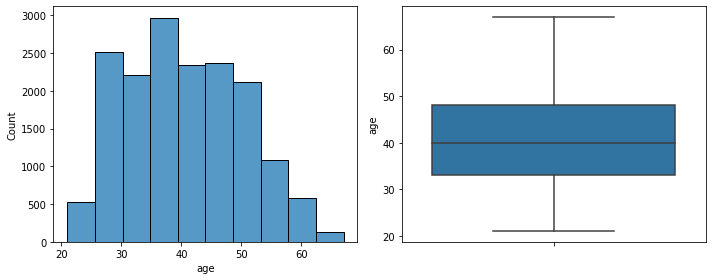

In [ ]:
plotting_cont(X_train,'age',10)

In [ ]:
X_train['age'].describe()

count    16839.000000
mean        40.489934
std          9.543338
min         21.000000
25%         33.000000
50%         40.000000
75%         48.000000
max         67.000000
Name: age, dtype: float64

In [ ]:
age_bins = [ 0, 25, 30, 35, 40, 45, 50, 55, 70 ]
age_labels = ['below 25','25 to 30', '30 to 35', '35 to 40', '40 to 45','45 to 50', '50 to 55','above 55']
X_train['age_bins'] = pd.cut(X_train['age'] , bins=age_bins, labels = age_labels, include_lowest=True,)
X_train['age_bins'].value_counts(sort = False, normalize = True)

below 25    0.031653
25 to 30    0.149059
30 to 35    0.166815
35 to 40    0.179167
40 to 45    0.162658
45 to 50    0.133500
50 to 55    0.109389
above 55    0.067759
Name: age_bins, dtype: float64

In [ ]:
X_test['age_bins'] = pd.cut(X_test['age'] , bins=age_bins, labels = age_labels, include_lowest=True,)

In [ ]:
age_iv, age_WOE = calc_iv(X_train, 'age_bins')

In [ ]:
print(age_WOE)

below 25   -0.209285
25 to 30   -0.213197
30 to 35    0.071549
35 to 40    0.347438
40 to 45    0.045907
45 to 50   -0.131774
50 to 55   -0.311185
above 55    0.563021
Name: WOE, dtype: float64


In [ ]:
age_iv

0.059945204197501406

In [ ]:
IV_dict['age'] = age_iv

## ***16. Income***

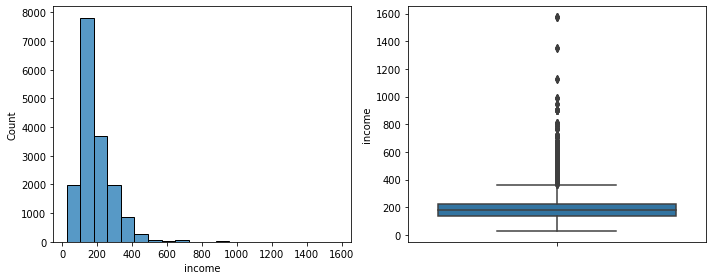

In [ ]:
X_train['income'] = X_train['income'] / 1000
X_test['income'] = X_test['income'] / 1000
plotting_cont(X_train, 'income', 20)

In [ ]:
X_train['income'].describe()

count    16839.000000
mean       195.072845
std        104.481958
min         27.000000
25%        135.000000
50%        180.000000
75%        225.000000
max       1575.000000
Name: income, dtype: float64

In [ ]:
income_bins = [ 0, 100, 150, 200, 250, 300, 1600 ]
income_labels = ['less than 10,000','10,000 to 15,000', '15,000 to 20,000', '20,000 to 25,000', '25,000 to 30,000','above 30,000']
X_train['income_bins'] = pd.cut(X_train['income'] , bins=income_bins, include_lowest=True, labels=income_labels)
X_train['income_bins'].value_counts(sort = False, normalize = True)

less than 10,000    0.108558
10,000 to 15,000    0.269018
15,000 to 20,000    0.215868
20,000 to 25,000    0.201259
25,000 to 30,000    0.086525
above 30,000        0.118772
Name: income_bins, dtype: float64

In [ ]:
X_test['income_bins'] = pd.cut(X_test['income'] , bins=income_bins, include_lowest=True, labels=income_labels)

In [ ]:
income_iv, income_WOE = calc_iv(X_train, 'income_bins')

In [ ]:
print(income_WOE)

less than 10,000    0.024176
10,000 to 15,000   -0.011529
15,000 to 20,000    0.144328
20,000 to 25,000   -0.150088
25,000 to 30,000   -0.172323
above 30,000        0.185542
Name: WOE, dtype: float64


In [ ]:
income_iv

0.015711420868501066

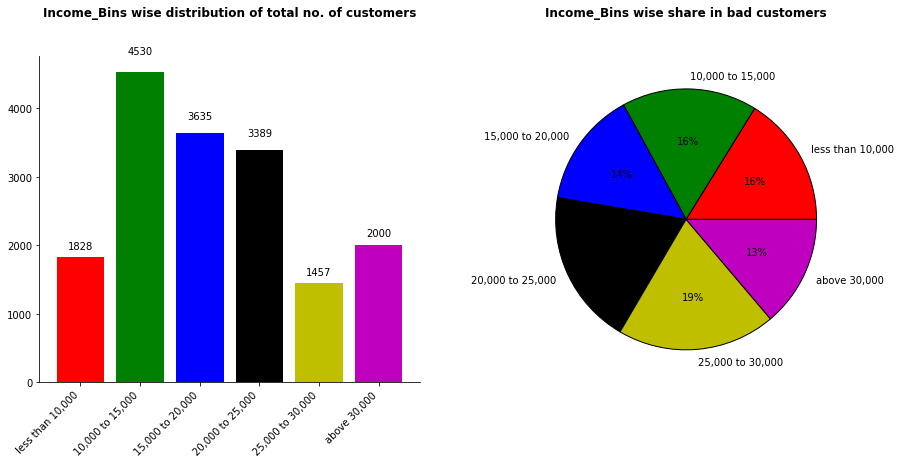

In [ ]:
plotting(X_train, 'income_bins')

In [ ]:
IV_dict['income'] = income_iv

## ***17. Employed Months***

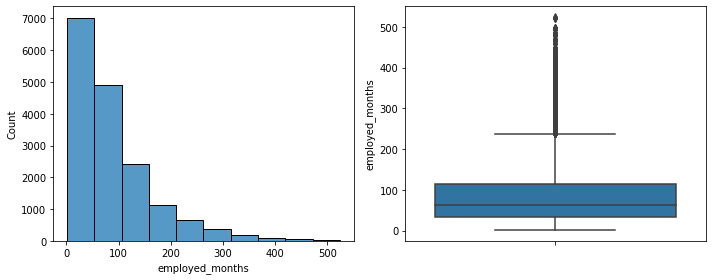

In [ ]:
plotting_cont(X_train,'employed_months', 10)

In [ ]:
X_train['employed_months'].describe()

count    16839.000000
mean        87.129936
std         77.476358
min          1.000000
25%         33.000000
50%         64.000000
75%        115.000000
max        524.000000
Name: employed_months, dtype: float64

In [ ]:
empl_bins = [0, 75, 125, 150, 175, 200, 525]
empl_labels = ['below 75', '75 to 125', '125 to 150', '150 to 175', '175 to 200', 'above 200']

X_train['empl_bins'] = pd.cut(X_train['employed_months'] , labels=empl_labels, bins=empl_bins, include_lowest=True)
X_train['empl_bins'].value_counts(sort = False, normalize = True)

below 75      0.560603
75 to 125     0.222757
125 to 150    0.056535
150 to 175    0.039907
175 to 200    0.031831
above 200     0.088366
Name: empl_bins, dtype: float64

In [ ]:
X_test['empl_bins'] = pd.cut(X_test['employed_months'] , labels=empl_labels, bins=empl_bins, include_lowest=True)

In [ ]:
empl_iv, empl_WOE = calc_iv(X_train, 'empl_bins')
print(empl_WOE)

below 75     -0.145408
75 to 125    -0.015372
125 to 150    0.291916
150 to 175    0.640473
175 to 200    1.110852
above 200     0.517949
Name: WOE, dtype: float64


In [ ]:
empl_iv

0.07177513495178996

In [ ]:
IV_dict['employed_months'] = empl_iv

In [ ]:
IV = pd.DataFrame.from_dict(IV_dict, orient='index', columns=['IV'] )
IV

,IV
Feature,Value
gender,0.0158203
car,0.000528756
realty,0.0450091
income_type,0.013574
education,0.0165977
family_status,0.0267982
work_phone,0.0030466
phone,0.000225735
email,0.000569662


In [ ]:
IV = IV.drop(labels='Feature', axis=0)

In [ ]:
IV.sort_values('IV', ascending=False)

,IV
month_begin,0.220249
employed_months,0.0717751
age,0.0599452
occupation,0.0487989
realty,0.0450091
family_status,0.0267982
education,0.0165977
gender,0.0158203
income,0.0157114
income_type,0.013574


In [ ]:
X_train.drop(['income_type', 'occupation', 'children', 'family_members', 'month_begin', 'age', 'income', 'employed_months'], axis = 1, inplace = True)

In [ ]:
X_train.drop(['income_type_bins', 'family_members_bins', 'house_type', 'work_phone', 'children_bins', 'phone', 'email', 'car'], axis = 1, inplace = True)

In [ ]:
X_train.head()

,ID,bad,gender,realty,education,family_status,occupation_bins,month_begin_bins,age_bins,income_bins,empl_bins
2919,5022513,0,M,Y,Secondary / secondary special,Married,Drivers,10 to 20,40 to 45,"10,000 to 15,000",below 75
21211,5090939,0,F,N,Higher education,Separated,Core staff,below 10,35 to 40,"15,000 to 20,000",125 to 150
15429,5065419,0,F,Y,Secondary / secondary special,Married,Sales staff,40 to 50,40 to 45,"25,000 to 30,000",75 to 125
16362,5067193,0,M,Y,Lower secondary,Single / not married,Laborers,40 to 50,30 to 35,"15,000 to 20,000",75 to 125
2228,5021645,0,F,Y,Higher education,Civil marriage,Managers,above 50,30 to 35,"25,000 to 30,000",175 to 200


In [ ]:
X_train.shape

(16839, 11)

In [ ]:
y_train.shape

(16839,)

In [ ]:
X_train.rename(columns={'occupation_bins':'occupation', 'month_begin_bins':'month_begin','age_bins':'age','income_bins':'income','empl_bins':'employed_months'}, inplace=True)

In [ ]:
X_train.drop(['bad', 'ID'], axis=1, inplace=True)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [ ]:
X_train.head()

,gender_M,realty_Y,education_Higher education,education_Incomplete higher,education_Lower secondary,education_Secondary / secondary special,family_status_Married,family_status_Separated,family_status_Single / not married,family_status_Widow,occupation_Core staff,occupation_Drivers,occupation_High skill tech staff,occupation_Laborers,occupation_Managers,occupation_Medicine staff,occupation_Other Occupations,occupation_Sales staff,month_begin_10 to 20,month_begin_20 to 30,month_begin_30 to 40,month_begin_40 to 50,month_begin_above 50,age_25 to 30,age_30 to 35,age_35 to 40,age_40 to 45,age_45 to 50,age_50 to 55,age_above 55,"income_10,000 to 15,000","income_15,000 to 20,000","income_20,000 to 25,000","income_25,000 to 30,000","income_above 30,000",employed_months_75 to 125,employed_months_125 to 150,employed_months_150 to 175,employed_months_175 to 200,employed_months_above 200
2919,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
21211,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15429,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
16362,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2228,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000, class_weight = 'balanced')

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test.shape

(8295, 27)

In [ ]:
X_test.drop(['income_type', 'occupation', 'children', 'family_members', 'month_begin', 'age', 'income', 'employed_months'], axis = 1, inplace = True)

In [ ]:
X_test.drop(['income_type_bins', 'family_members_bins', 'house_type', 'work_phone', 'children_bins', 'phone', 'email', 'car'], axis = 1, inplace = True)

In [ ]:
X_test.rename(columns={'occupation_bins':'occupation', 'month_begin_bins':'month_begin','age_bins':'age','income_bins':'income','empl_bins':'employed_months'}, inplace=True)

In [ ]:
X_test.drop(['bad', 'ID'], axis=1, inplace=True)

In [ ]:
X_test.shape

(8295, 9)

In [ ]:
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
X_test.shape

(8295, 40)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
X_test.shape

(8295, 40)

In [ ]:
y_test.shape

(8295,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.64      0.77      8156
           1       0.03      0.60      0.05       139

    accuracy                           0.64      8295
   macro avg       0.51      0.62      0.41      8295
weighted avg       0.97      0.64      0.76      8295

[[5184 2972]
 [  55   84]]
